## Handling Missing Values -  Random Value Imputation [ Categorical ]
    Random Value Imputation from the Same Column is a technique used to handle missing data where you replace the missing values (NA or null) in a feature (column) by randomly selecting a value from the existing, non-missing values in that same column. This method can be applied to both numerical and categorical features.
    
    -> How It Works 
        - Identify Known Values: Collect all the observed (non-missing) data points in the column with missing values.
        - Random Sampling: For each missing entry, a value is chosen at random from the list of known values collected.
        - Replacement: The missing entry is replaced with the randomly sampled value.
       Variance Is Mantain But Co-Variance is Not.

    -> Advantages
        - Maintains statistical properties
        - Reduces imputation bias

    -> Disadvantages
        - Introduces randomness
        - Slight noise added

### Import Libraries

In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### Load dataset

In [37]:
data = pd.read_csv("house-train.csv",usecols=['GarageQual','FireplaceQu','SalePrice'])
data.head(3)

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500


### Check For Null Values 

In [40]:
data.isnull().mean()*100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

#### Splitting The X & y into Train And Test Data

In [43]:
X = data
y = data['SalePrice']
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

### Create new feature for imputation 

In [46]:
X_train['GarageQual_Imputed'] = X_train['GarageQual']
X_train['FireplaceQu_Imputed'] = X_train['FireplaceQu']
X_test['GarageQual_Imputed'] = X_test['GarageQual']
X_test['FireplaceQu_Imputed'] = X_test['FireplaceQu']

In [48]:
X_train.head(2)

,FireplaceQu,GarageQual,SalePrice,GarageQual_Imputed,FireplaceQu_Imputed
254,NaN,TA,145000,TA,NaN
1066,TA,TA,178000,TA,TA


In [50]:
X_test.head(2)

,FireplaceQu,GarageQual,SalePrice,GarageQual_Imputed,FireplaceQu_Imputed
892,NaN,TA,154500,TA,NaN
1105,TA,TA,325000,TA,TA


#### Filling The NaN Values 

In [53]:
X_train['GarageQual_Imputed'][X_train['GarageQual_Imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_train['GarageQual'].isnull().sum()).values
X_train['FireplaceQu_Imputed'][X_train['FireplaceQu_Imputed'].isnull()] = X_train['FireplaceQu'].dropna().sample(X_train['FireplaceQu'].isnull().sum()).values
X_train.sample(5)

,FireplaceQu,GarageQual,SalePrice,GarageQual_Imputed,FireplaceQu_Imputed
537,NaN,TA,111250,TA,Gd
1016,TA,TA,203000,TA,TA
1144,NaN,TA,80000,TA,Gd
789,NaN,TA,187500,TA,TA
1002,Gd,TA,232000,TA,Gd


In [55]:
X_test['GarageQual_Imputed'][X_test['GarageQual_Imputed'].isnull()] = X_test['GarageQual'].dropna().sample(X_test['GarageQual'].isnull().sum()).values
X_test['FireplaceQu_Imputed'][X_test['FireplaceQu_Imputed'].isnull()] = X_test['FireplaceQu'].dropna().sample(X_test['FireplaceQu'].isnull().sum()).values
X_test.sample(5)

,FireplaceQu,GarageQual,SalePrice,GarageQual_Imputed,FireplaceQu_Imputed
427,NaN,TA,109008,TA,Gd
599,TA,TA,151000,TA,TA
247,TA,TA,140000,TA,TA
838,NaN,TA,144000,TA,Gd
316,TA,TA,260000,TA,TA


In [74]:
temp = pd.concat(
    [X_train['GarageQual'].value_counts()/len(X_train['GarageQual'].dropna()),
    X_train['GarageQual_Imputed'].value_counts()/len(X_train)
    ], axis=1
)
temp.columns = ['Original','Imputed']
temp

,Original,Imputed
TA,0.951087,0.951199
Fa,0.032609,0.032534
Gd,0.011775,0.011986
Ex,0.002717,0.002568
Po,0.001812,0.001712


In [75]:
temp = pd.concat(
    [X_train['FireplaceQu'].value_counts()/len(X_train['FireplaceQu'].dropna()),
    X_train['FireplaceQu_Imputed'].value_counts()/len(X_train)
    ], axis=1
)
temp.columns = ['Original','Imputed']
temp

,Original,Imputed
Gd,0.491143,0.492295
TA,0.405797,0.405822
Fa,0.043478,0.042808
Ex,0.033816,0.032534
Po,0.025765,0.026541


### Check Distribution for Original GarageQual VS Imputed GarageQual and Original FireplaceQu VS Imputed FireplaceQu

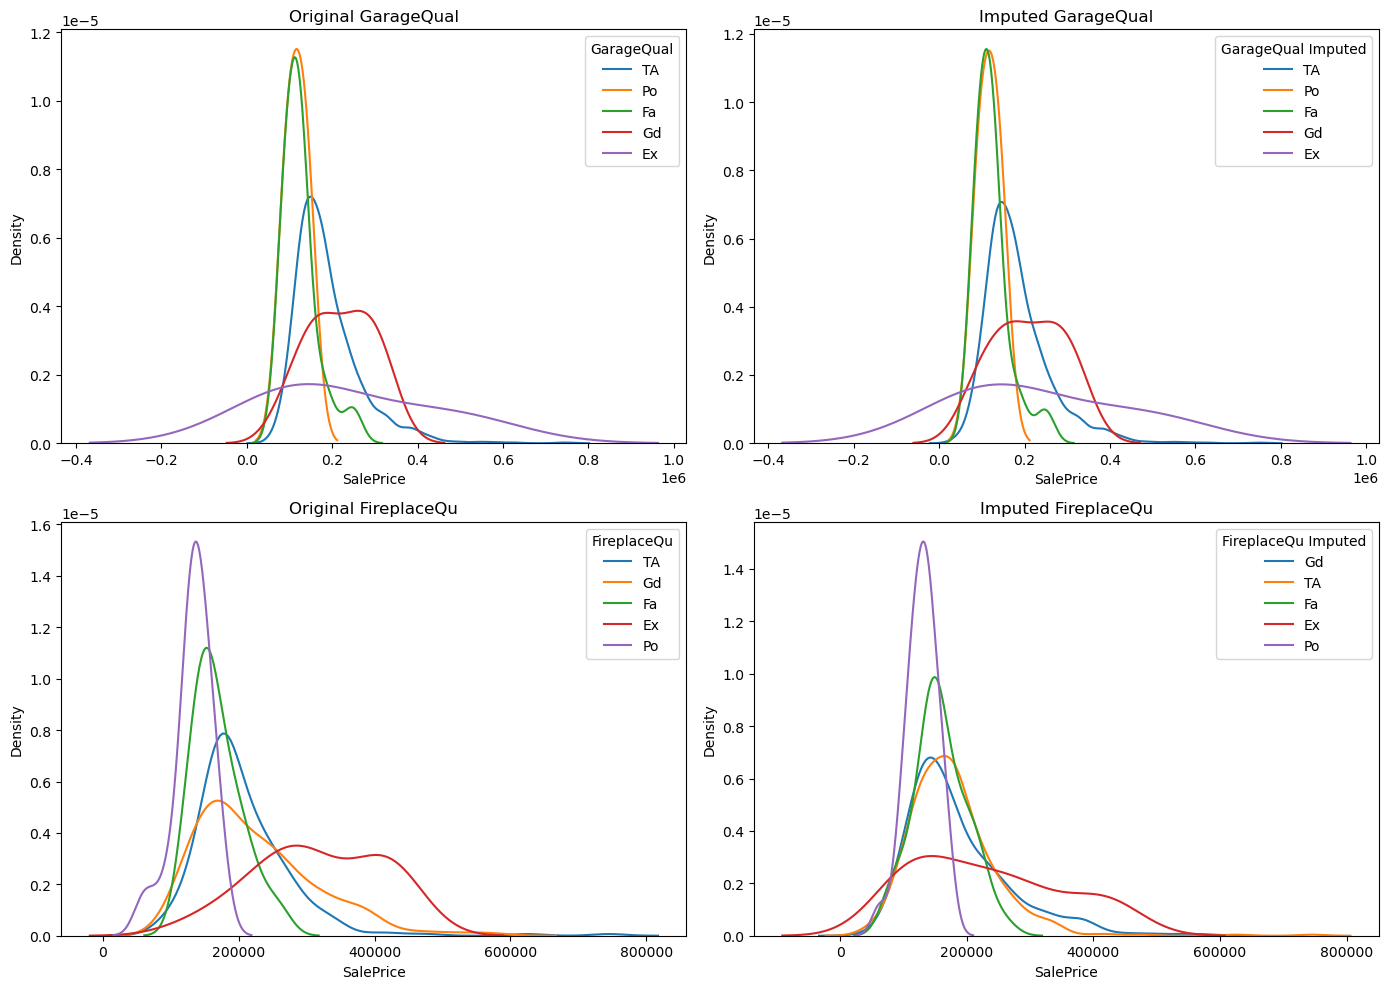

In [75]:
plt.figure(figsize=(14, 10))
plt.subplot(2, 2, 1)
for category in X_train['GarageQual'].dropna().unique():
    sns.kdeplot(X_train[X_train['GarageQual'] == category]['SalePrice'],label=category, fill=False)
plt.title('Original GarageQual')
plt.legend(title='GarageQual')

plt.subplot(2, 2, 2)
for category in X_train['GarageQual_Imputed'].dropna().unique():
    sns.kdeplot( X_train[X_train['GarageQual_Imputed'] == category]['SalePrice'], label=category, fill=False )
plt.title('Imputed GarageQual')
plt.legend(title='GarageQual Imputed')

plt.subplot(2, 2, 3)
for category in X_train['FireplaceQu'].dropna().unique():
    sns.kdeplot(X_train[X_train['FireplaceQu'] == category]['SalePrice'],label=category, fill=False)
plt.title('Original FireplaceQu')
plt.legend(title='FireplaceQu')

plt.subplot(2, 2, 4)
for category in X_train['FireplaceQu_Imputed'].dropna().unique():
    sns.kdeplot( X_train[X_train['FireplaceQu_Imputed'] == category]['SalePrice'], label=category, fill=False )
plt.title('Imputed FireplaceQu')
plt.legend(title='FireplaceQu Imputed')
plt.tight_layout()
plt.show()

### Check Distribution for Original FireplaceQu VS Imputed FireplaceQu